In [105]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [106]:
df = pd.read_csv('loan-train.csv')
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [107]:
#clean_data
df = df.drop(['Loan_ID'], axis=1)
#categorical variables
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
#numerical
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
df.describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,614,614,614,614,614.000000,614.000000,614.000000,614.000000,614.000000,614,614
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,502,401,360,480,532,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.000000,0.855049,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,84.037468,64.372489,0.352339,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.250000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,129.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,164.750000,360.000000,1.000000,NaN,NaN


In [108]:
df.loc[df['Dependents'] == '3+', 'Dependents'] = 3
df['Dependents'] = df['Dependents'].astype(int)

In [109]:
df['Loan_Status'] = (df.Loan_Status == 'Y').astype(int)
df['Gender'] = (df.Gender == 'Male').astype(int)
df['Married'] = (df.Married == 'Yes').astype(int)
df['Education'] = (df.Education == 'Graduate').astype(int)
df['Self_Employed'] = (df.Self_Employed != 'No').astype(int)

In [110]:
df.loc[df['Property_Area'] == 'Rural', 'Property_Area'] = 0
df.loc[df['Property_Area'] == 'Semiurban', 'Property_Area'] = 0.5
df.loc[df['Property_Area'] == 'Urban', 'Property_Area'] = 1
df['Property_Area'] = df['Property_Area'].astype('float64')

In [111]:
df.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status            int64
dtype: object

In [112]:
corr_mat = df.corr()

<AxesSubplot:>

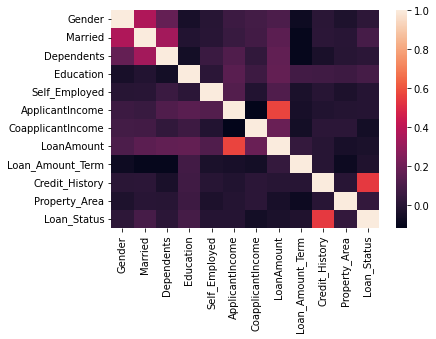

In [113]:
sns.heatmap(corr_mat,
            xticklabels=corr_mat.columns,
            yticklabels=corr_mat.columns)

In [114]:
corr_mat

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,-0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,-0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,-0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.040160,-0.000244,0.010118
Education,-0.045364,-0.012304,-0.055752,1.000000,0.010383,0.140760,0.062290,0.166998,0.077242,0.073658,0.065243,0.085884
Self_Employed,-0.000525,0.004489,0.056798,0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.000432,-0.077620,-0.020974
Credit_History,0.009170,0.010938,-0.040160,0.073658,-0.001550,-0.018615,0.011134,-0.001431,0.000432,1.000000,0.001963,0.540556


Relation features/target

In [115]:
#Gender

In [116]:
men_count = df.loc[df.Gender == 1, 'Gender'].count()
women_count = df.loc[df.Gender == 0, 'Gender'].count()
men_positive_count = df.loc[(df.Gender == 1) & (df.Loan_Status == 1), 'Gender'].count()
men_negative_count = df.loc[(df.Gender == 1) & (df.Loan_Status == 0), 'Gender'].count()
women_positive_count = df.loc[(df.Gender == 0) & (df.Loan_Status == 1), 'Gender'].count()
women_negative_count = df.loc[(df.Gender == 0) & (df.Loan_Status == 0), 'Gender'].count()

In [117]:
print(f'probability of a man to get a loan is {men_positive_count / men_count}')
print(f'probability of a woman to get a loan is {women_positive_count / women_count}')

probability of a man to get a loan is 0.6912350597609562
probability of a woman to get a loan is 0.6696428571428571


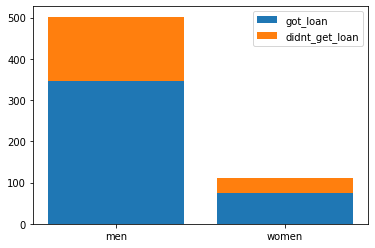

In [118]:
got_loan = [men_positive_count, women_positive_count]
didnt_get_loan = [men_negative_count, women_negative_count]
plt.bar(['men', 'women'], got_loan, label='got_loan')
plt.bar(['men', 'women'], didnt_get_loan, bottom=got_loan, label='didnt_get_loan')
plt.legend()

In [119]:
#Education

In [120]:
graduate_count = df.loc[df.Education == 1, 'Gender'].count()
not_graduate_count = df.loc[df.Education == 0, 'Gender'].count()
graduate_positive_count = df.loc[(df.Education == 1) & (df.Loan_Status == 1), 'Gender'].count()
graduate_negative_count = df.loc[(df.Education == 1) & (df.Loan_Status == 0), 'Gender'].count()
not_graduate_positive_count = df.loc[(df.Education == 0) & (df.Loan_Status == 1), 'Gender'].count()
not_graduate_negative_count = df.loc[(df.Education == 0) & (df.Loan_Status == 0), 'Gender'].count()

In [121]:
print(f'probability of getting a loan while being a graduate is {graduate_positive_count / graduate_count}')
print(f'probability of getting a loan while not being a graduate is {not_graduate_positive_count / not_graduate_count}')

probability of getting a loan while being a graduate is 0.7083333333333334
probability of getting a loan while not being a graduate is 0.6119402985074627


In [122]:
#Married

In [123]:
married_count = df.loc[df.Married == 1, 'Gender'].count()
not_married_count = df.loc[df.Married == 0, 'Gender'].count()
married_positive_count = df.loc[(df.Married == 1) & (df.Loan_Status == 1), 'Gender'].count()
married_negative_count = df.loc[(df.Married == 1) & (df.Loan_Status == 0), 'Gender'].count()
not_married_positive_count = df.loc[(df.Married == 0) & (df.Loan_Status == 1), 'Gender'].count()
not_married_negative_count = df.loc[(df.Married == 0) & (df.Loan_Status == 0), 'Gender'].count()

In [124]:
print(f'probability of getting a loan while being married is {married_positive_count / married_count}')
print(f'probability of getting a loan while not being married is {not_married_positive_count / not_married_count}')

probability of getting a loan while being married is 0.7182044887780549
probability of getting a loan while not being married is 0.6291079812206573


In [125]:
#Loan_amount

In [126]:
loan_amount_pos = df.loc[df.Loan_Status == 1, 'LoanAmount']
loan_amount_neg = df.loc[df.Loan_Status == 0, 'LoanAmount']

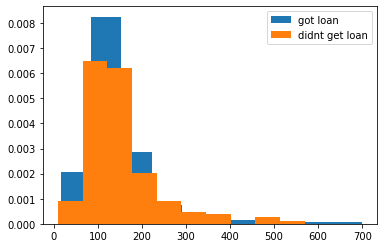

In [127]:
plt.hist(loan_amount_pos, density=True, label='got loan')
plt.hist(loan_amount_neg, density=True, label='didnt get loan')
plt.legend()

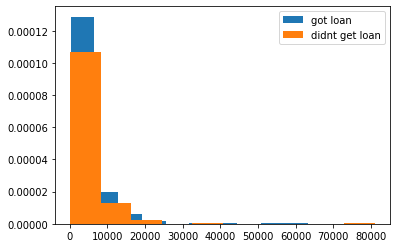

In [128]:
#ApplicantIncome
applicant_income_pos = df.loc[df.Loan_Status == 1, 'ApplicantIncome']
applicant_income_neg = df.loc[df.Loan_Status == 0, 'ApplicantIncome']
plt.hist(applicant_income_pos, density=True, label='got loan')
plt.hist(applicant_income_neg, density=True, label='didnt get loan')
plt.legend()

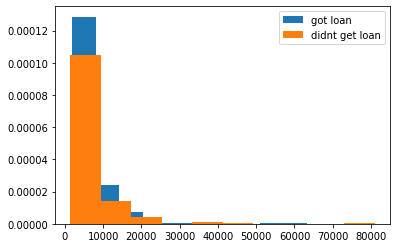

In [129]:
#totalIncome
total_income_pos = df.loc[df.Loan_Status == 1, 'ApplicantIncome'] + df.loc[df.Loan_Status == 1, 'CoapplicantIncome']
total_income_neg = df.loc[df.Loan_Status == 0, 'ApplicantIncome'] + df.loc[df.Loan_Status == 0, 'CoapplicantIncome']
plt.hist(total_income_pos, density=True, label='got loan')
plt.hist(total_income_neg, density=True, label='didnt get loan')
plt.legend()

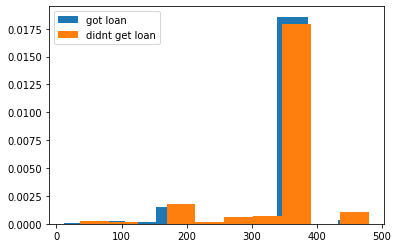

In [130]:
#term
term_pos = df.loc[df.Loan_Status == 1, 'Loan_Amount_Term']
term_neg = df.loc[df.Loan_Status == 0, 'Loan_Amount_Term']
plt.hist(term_pos, density=True, label='got loan')
plt.hist(term_neg, density=True, label='didnt get loan')
plt.legend()

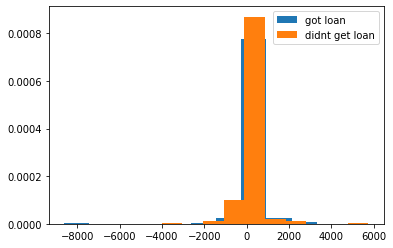

In [131]:
#revenue-loan
diff_pos = total_income_pos / 12 - (loan_amount_pos * 1000) / term_pos
diff_neg = total_income_neg / 12 - (loan_amount_neg * 1000) / term_neg
plt.hist(diff_pos, density=True, label='got loan')
plt.hist(diff_neg, density=True, label='didnt get loan')
plt.legend()

In [132]:
#dependencies
no_dendencies_count = df.loc[df.Dependents == 0, 'Gender'].count()
one_dendencie_count = df.loc[df.Dependents == 1, 'Gender'].count()
two_dendencies_count = df.loc[df.Dependents == 2, 'Gender'].count()
morethanthree_dendencies_count = df.loc[df.Dependents == 3, 'Gender'].count()
no_dendencies_positive_count = df.loc[(df.Dependents == 0) & (df.Loan_Status == 1), 'Gender'].count()
one_dendencie_positive_count = df.loc[(df.Dependents == 1) & (df.Loan_Status == 1), 'Gender'].count()
two_dendencies_positive_count = df.loc[(df.Dependents == 2) & (df.Loan_Status == 1), 'Gender'].count()
morethanthree_dendencies_positive_count = df.loc[(df.Dependents == 3) & (df.Loan_Status == 1), 'Gender'].count()
print(f'probability to get a loan while having no dependents is {no_dendencies_positive_count / no_dendencies_count}')
print(f'probability to get a loan while having 1 dependent is {one_dendencie_positive_count / one_dendencie_count}')
print(f'probability to get a loan while having 2 dependents is {two_dendencies_positive_count / two_dendencies_count}')
print(
    f'probability to get a loan while having +3 dependent is {morethanthree_dendencies_positive_count / morethanthree_dendencies_count}')

probability to get a loan while having no dependents is 0.6861111111111111
probability to get a loan while having 1 dependent is 0.6470588235294118
probability to get a loan while having 2 dependents is 0.7524752475247525
probability to get a loan while having +3 dependent is 0.6470588235294118


CLASSIFICATION

In [138]:
#Using brut data
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier

rs = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
scores = []
for train_index, test_index in rs.split(df):
    X_train = df.loc[train_index].drop(['Loan_Status'], axis=1)
    X_test = df.loc[test_index].drop(['Loan_Status'], axis=1)
    y_train = df.loc[train_index, 'Loan_Status']
    y_test = df.loc[test_index, 'Loan_Status']
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
print(sum(scores) / len(scores))



0.7821138211382115


In [134]:
def remove_outliers(x, y):
    df = x[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return x.loc[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)],
           y.loc[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [139]:
#pre processed data data
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

rs = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
scores = []
for train_index, test_index in rs.split(df):
    X_train = df.loc[train_index].drop(['Loan_Status'], axis=1)
    X_test = df.loc[test_index].drop(['Loan_Status'], axis=1)
    y_train = df.loc[train_index, 'Loan_Status']
    y_test = df.loc[test_index, 'Loan_Status']
    X_train, y_train = remove_outliers(X_train, y_train)
    #square root transformation
    X_train.ApplicantIncome = np.sqrt(X_train.ApplicantIncome)
    X_train.CoapplicantIncome = np.sqrt(X_train.CoapplicantIncome)
    X_train.LoanAmount = np.sqrt(X_train.LoanAmount)
    X_test.ApplicantIncome = np.sqrt(X_test.ApplicantIncome)
    X_test.CoapplicantIncome = np.sqrt(X_test.CoapplicantIncome)
    X_test.LoanAmount = np.sqrt(X_test.LoanAmount)
    #data_normalization
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    scaler.transform(X_train)
    scaler.transform(X_test)
    #got_loan >> didnt_get_loan, We need to resample
    X_train, y_train = SMOTE().fit_resample(X_train, y_train)
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
print(sum(scores) / len(scores))

0.775609756097561
